In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from icecream import ic

# Angular Correlation Function

\begin{align}
    W(\vartheta) &= 1 + A_2P_2(\cos\vartheta) + A_4P_4(\cos\vartheta) \\
    P_2          &= \frac{1}{2}\left(3\cos^2(\vartheta) - 1 \right) \\
    P_4          &= \frac{1}{8}\left(35\cos^4(\vartheta) - 30\cos^2(\vartheta) + 3 \right)
\end{align}
The coefficients $A_2, A_4$ are actually more complicated to compute (equations (2.12) and (2.13) in the manual), but for now we read them from the table of coefficients $F_\nu(I,I',L,L')$. \
This simplified calculation is adopted from the manual page 13.

ic| sweetspot: 53.2812531393647


        2-11    2-12    2-22    4-22    4-23    4-24
I I’                                                
1 0   0.7017     NaN     NaN     NaN     NaN     NaN
  1  -0.3536 -1.0607 -0.3536     NaN     NaN     NaN
  2   0.0707  0.4743  0.3536     NaN     NaN     NaN
2 0      NaN     NaN -0.5976 -1.0690     NaN     NaN
  1  -0.3354 -0.9354 -0.2988  0.7127  0.9960  0.0891
  2  -0.4183 -0.6124  0.1281 -0.3054 -0.7986 -0.1336
  3   0.1195  0.6547  0.3415  0.0764  0.3260  0.0891
  4      NaN     NaN -0.1707 -0.0085 -0.0627 -0.0297
4 2      NaN     NaN -0.4477 -0.3044  0.9004 -0.0484
  3   0.3134 -0.9402 -0.0448  0.6088 -0.3035 -0.1013
  4  -0.4387 -0.3354  0.2646 -0.4981 -0.6139  0.0132


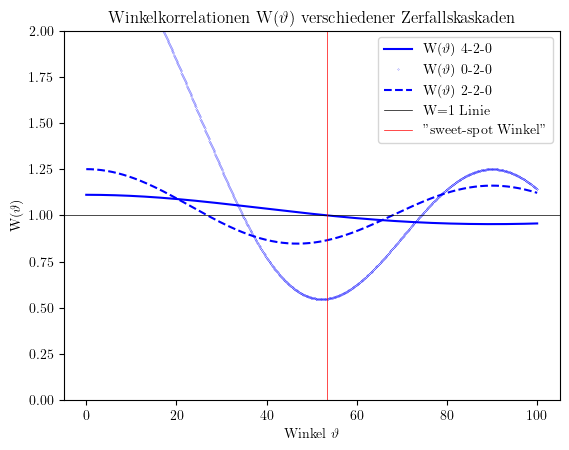

In [3]:
# coefficients F(I,I`,L,L`)
df = pd.read_excel("angularcorrelationcoefficient.ods")
df.set_index(['I','I’'], inplace=True)
print(df)

# angular correlation function
def angular(theta, i0, i1, i2, l1, l2,):
    '''
    theta: angle between the two detectors
    i0: first level of cascade
    i1: second level of cascade
    i2: third level of cascade
        i.e. a cascade of 4-2-0 would have i0=4, i1=2, i2=0
    l1: first transition
    l2: second transition
    
    this function assumes L1 = L2, like in the example in the manual; 
    i suspect this doesnt always have to be the case
    '''
    thetadeg= theta / 180 * np.pi 
    a_nu2_t1 = df.loc[(i1,i0),f'2-{l1}{l1}']
    a_nu2_t2 = df.loc[(i1,i2), f'2-{l2}{l2}']
    a2 = a_nu2_t1 * a_nu2_t2
    p2 = .5 * (3*np.cos(thetadeg)**2 - 1)

    a_nu4_t1 = df.loc[(i1,i0), f'4-{l1}{l1}']
    a_nu4_t2 = df.loc[(i1,i2), f'4-{l2}{l2}']
    a4 = a_nu4_t1 * a_nu4_t2
    p4 = .125 * (35*np.cos(thetadeg)**4 - 30*np.cos(thetadeg)**2 + 3)
    
    return 1 + a2*p2 + a4*p4


'''
for correct calculation of a2 and a4 see manual chapter 2.4.2, for now it isn't implemented because of the missing delta
what is this Mischungsverhältnis delta. we just kinda ignored it
'''
plt.rc('text', usetex=True)
plt.rc('font', family='STIXGeneral')
fig, ax = plt.subplots()
x = np.linspace(0,100,1000)

ax.plot(x,angular(x,4,2,0,2,2), 'b', label=f'W($\\vartheta$) 4-2-0')
ax.plot(x,angular(x,0,2,0,2,2), 'b.', markersize=.3, label=f'W($\\vartheta$) 0-2-0')
ax.plot(x,angular(x,2,2,0,2,2), 'b--', label=f'W($\\vartheta$) 2-2-0')

ax.set_title(f'Winkelkorrelationen W$(\\vartheta)$ verschiedener Zerfallskaskaden')
ax.set(xlabel=f'Winkel $\\vartheta$', ylabel=f'W$(\\vartheta)$')
ax.set_ylim(0, 2) 
ax.axhline(1, linewidth=.5, color='k', label=f'W=1 Linie') # W = 1 line
sweetspot = np.interp(-1,-angular(x,4,2,0,2,2), x) # np.interp works primarily for increasing functions, which is why we invert it
ic(sweetspot)
ax.axvline(sweetspot, linewidth=.5, color='r', label=f'"sweet-spot Winkel"') # angle at which W = 1
ax.legend()
plt.show()

So the sweetspot angle doesn't lie exactly at 55 degrees as the plot in the manual shows, but at 53 degrees. Probably because the source of the plot didn't simplify the calculation of the $A_\nu$ coefficients. The plot also did not specify the jumps $L, L'$ for different angular correlations. \
I'd still say it's good enough.